In [1]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [2]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[0]+dh[1])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

In [3]:
dir0  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2//qgcm-data/double_gyre_coupled/outdata_6/'
file0 = 'ocpo.nc'

In [4]:
#get xp, yp : basin size
f1 = netcdf.netcdf_file(dir0 + file0,'r')

xp = f1.variables['xp'][:-1].copy()
yp = f1.variables['xp'][:-1].copy()

In [5]:
#load absolute wind run

# flot moyen
flot_me = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/termes_flot_moyen_abs.npz')

e_surf = integral_z( flot_me['e_surf'], dh=dh, Delta=Delta, Ht = dh[0])
e_diab = integral_z(flot_me['e_diab'], dh=dh, Delta=Delta, Ht = dh_b[0] )
dissip_ke_me = integral_z(flot_me['e_dissip_k'], dh=dh, Delta=Delta, Ht = Ht)
w_b_me = integral_z(flot_me['w_b_me'], dh=dh, Delta=Delta, Ht = Ht_b)
e_bottom_me = integral_z(flot_me['e_bottom'], dh=dh, Delta=Delta, Ht = dh[2])
ke_me_i = integral_z(flot_me['ke_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me_i = integral_z(flot_me['pe_me'], dh=dh, Delta=Delta, Ht = Ht_b)
u_me = flot_me['u_me']
v_me = flot_me['v_me']
taux_me = flot_me['taux_me']
tauy_me = flot_me['tauy_me']

#attention à l'intégration !!

flot_me_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/etapes_flot_moyen_abs.npz')

surf_me= flot_me_et['surf_me']
diab_me= flot_me_et['diab_me']
dissip_me= flot_me_et['dissip_me']
bottom_ekman_me= flot_me_et['bottom_ekman_me']
w_me = flot_me_et['w_me']

b_me= flot_me_et['b_me']
p_me= flot_me_et['p_me']

#load perturbations

flot_pert = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/termes_perturbation_abs.npz')

e_surf_p_me = flot_pert['e_surf_p_me']
e_diab_p_me = integral_z(flot_pert['e_diab_p_me'], dh=dh, Delta=Delta, Ht = dh_b[0])
#dissip_k_p_me = integral_z(flot_pert['dissip_k_p_me'], dh=dh, Delta=Delta, Ht = Ht)
e_bottom_p_me = flot_pert['e_bottom_p_me']
w_b_p_me = integral_z(flot_pert['w_b_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)
ke_me2ke_p_me = integral_z(flot_pert['ke_me2ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me2pe_p_me = integral_z(flot_pert['pe_me2pe_p_me'], dh=dh, Delta=Delta, Ht = Ht)
ke_p_me = integral_z(flot_pert['ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_p_me = integral_z(flot_pert['pe_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)


#flux perturbations


flot_pert_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/etapes_perturbation_abs.npz')

k_surf_p_me = flot_pert_et['k_vt_p_me']
fl_surf_p_me = flot_pert_et['fl_vt_p_me']

k_diab_p_me = flot_pert_et['k_diab_p_me']
fl_diab_p_me = flot_pert_et['fl_diab_p_me']

k_dissip_p_me = flot_pert_et['k_dissip_p_me']
fl_dissip_p_me = flot_pert_et['fl_dissip_p_me']

k_bottom_p_me = flot_pert_et['k_bottom_p_me']
fl_bottom_p_me = flot_pert_et['fl_bottom_p_me']

k_w_p_me = flot_pert_et['k_w_p_me']
fl_w_p_me = flot_pert_et['fl_w_p_me']

jac_ke = flot_pert_et['jac_ke']
jac_pe = flot_pert_et['jac_pe']





In [6]:
#load relative wind run

# flot moyen
flot_me_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_flot_moyen_rel.npz')

e_surf_rel = integral_z( flot_me_rel['e_surf'], dh=dh, Delta=Delta, Ht = dh[0])
e_diab_rel = integral_z(flot_me_rel['e_diab'], dh=dh, Delta=Delta, Ht = dh_b[0] )
dissip_ke_me_rel = integral_z(flot_me_rel['e_dissip_k'], dh=dh, Delta=Delta, Ht = Ht)
w_b_me_rel = integral_z(flot_me_rel['w_b_me'], dh=dh, Delta=Delta, Ht = Ht_b)
e_bottom_me_rel = integral_z(flot_me_rel['e_bottom'], dh=dh, Delta=Delta, Ht = dh[2])
ke_me_i_rel = integral_z(flot_me_rel['ke_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me_i_rel = integral_z(flot_me_rel['pe_me'], dh=dh, Delta=Delta, Ht = Ht_b)
u_me_rel = flot_me_rel['u_me']
v_me_rel = flot_me_rel['v_me']
taux_me_rel = flot_me_rel['taux_me']
tauy_me_rel = flot_me_rel['tauy_me']

#attention à l'intégration !!

flot_me_et_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_flot_moyen_rel.npz')

surf_me_rel= flot_me_et_rel['surf_me']
diab_me_rel= flot_me_et_rel['diab_me']
dissip_me_rel= flot_me_et_rel['dissip_me']
bottom_ekman_me_rel= flot_me_et_rel['bottom_ekman_me']
w_me_rel = flot_me_et_rel['w_me']

b_me_rel= flot_me_et_rel['b_me']
p_me_rel= flot_me_et_rel['p_me']

#load perturbations

flot_pert_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_perturbation_rel.npz')

e_surf_p_me_rel = flot_pert_rel['e_surf_p_me']
e_diab_p_me_rel = integral_z(flot_pert_rel['e_diab_p_me'], dh=dh, Delta=Delta, Ht = dh_b[0])
dissip_k_p_me_rel = integral_z(flot_pert_rel['dissip_k_p_me'], dh=dh, Delta=Delta, Ht = Ht)
e_bottom_p_me_rel = flot_pert_rel['e_bottom_p_me']
w_b_p_me_rel = integral_z(flot_pert_rel['w_b_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)
ke_me2ke_p_me_rel = integral_z(flot_pert_rel['ke_me2ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_me2pe_p_me_rel = integral_z(flot_pert_rel['pe_me2pe_p_me'], dh=dh, Delta=Delta, Ht = Ht)
ke_p_me_rel = integral_z(flot_pert_rel['ke_p_me'], dh=dh, Delta=Delta, Ht = Ht)
pe_p_me_rel = integral_z(flot_pert_rel['pe_p_me'], dh=dh, Delta=Delta, Ht = Ht_b)


#flux perturbations


flot_pert_rel_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_perturbation_rel.npz')

k_surf_p_me_rel = flot_pert_rel_et['k_vt_p_me']
fl_surf_p_me_rel = flot_pert_rel_et['fl_vt_p_me']

k_diab_p_me_rel = flot_pert_rel_et['k_diab_p_me']
fl_diab_p_me_rel = flot_pert_rel_et['fl_diab_p_me']

k_dissip_p_me_rel = flot_pert_rel_et['k_dissip_p_me']
fl_dissip_p_me_rel = flot_pert_rel_et['fl_dissip_p_me']

k_bottom_p_me_rel = flot_pert_rel_et['k_bottom_p_me']
fl_bottom_p_me_rel = flot_pert_rel_et['fl_bottom_p_me']

k_w_p_me_rel = flot_pert_rel_et['k_w_p_me']
fl_w_p_me_rel = flot_pert_rel_et['fl_w_p_me']

jac_ke_rel = flot_pert_rel_et['jac_ke']
jac_pe_rel = flot_pert_rel_et['jac_pe']





In [7]:
def forward(x):
    return 1/x

def inverse(x):
    return 1/x


<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


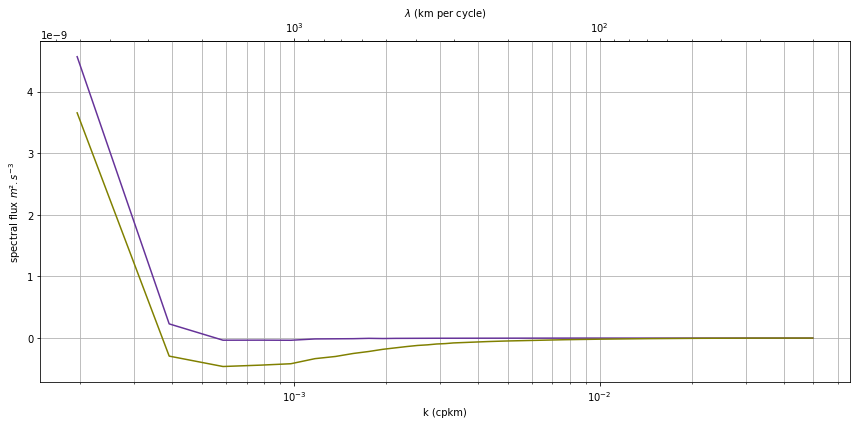

In [8]:
#forçage de vent flot moyen
p_me_use = -p_me[0,:,:]
k_vt_me,fl_vt_me = qg.get_spec_flux(psi1= p_me_use, psi2 = surf_me, Delta = Delta)

p_me_use_rel = -p_me_rel[0,:,:]
k_vt_me_rel,fl_vt_me_rel = qg.get_spec_flux(psi1= p_me_use_rel, psi2 = surf_me_rel, Delta = Delta)


fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)


ax2.plot(k_vt_me*1e3, fl_vt_me, color = 'rebeccapurple')
ax2.plot(k_vt_me_rel*1e3,fl_vt_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/vent_flot_moyen.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


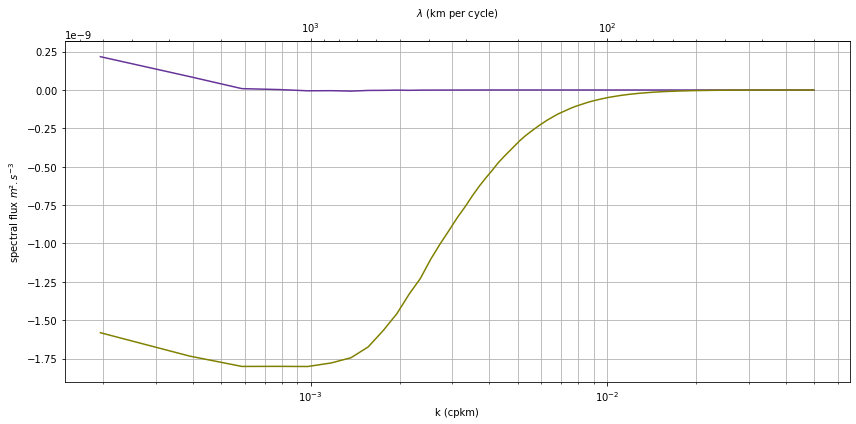

In [9]:
#forçage vent perturbation

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)

ax2.plot(k_surf_p_me*1e3, fl_surf_p_me, color = 'rebeccapurple')
ax2.plot(k_surf_p_me_rel*1e3, fl_surf_p_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/vent_perturbation.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


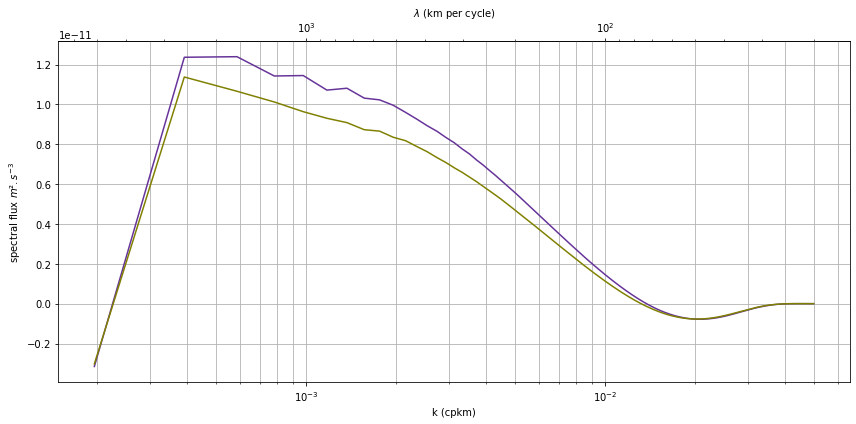

In [10]:
#dissipation flot moyen
k_diss_me,fl_diss_me = qg.get_spec_flux(psi1=-p_me , psi2 = dissip_me, Delta = Delta)

fl_diss_me = integral_z(fl_diss_me, dh=dh, Delta=Delta, Ht = Ht)

k_diss_me_rel,fl_diss_me_rel = qg.get_spec_flux(psi1=-p_me_rel , psi2 = dissip_me_rel, Delta = Delta)

fl_diss_me_rel = integral_z(fl_diss_me_rel, dh=dh, Delta=Delta, Ht = Ht)

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)

ax2.plot(k_diss_me*1e3, fl_diss_me, color = 'rebeccapurple')
ax2.plot(k_diss_me_rel*1e3, fl_diss_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/dissipation_flot_moyen.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


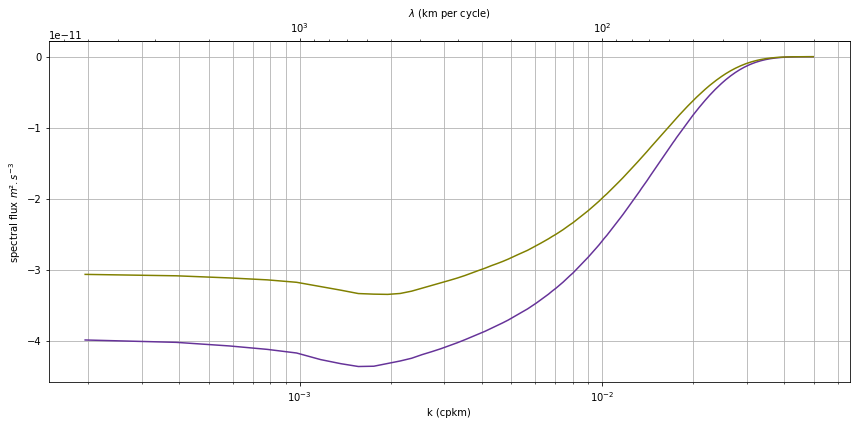

In [11]:
#dissipation perturbation

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)



ax2.plot(k_dissip_p_me*1e3, fl_dissip_p_me, color = 'rebeccapurple')
ax2.plot(k_dissip_p_me_rel*1e3, fl_dissip_p_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/dissipation_perturbation.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


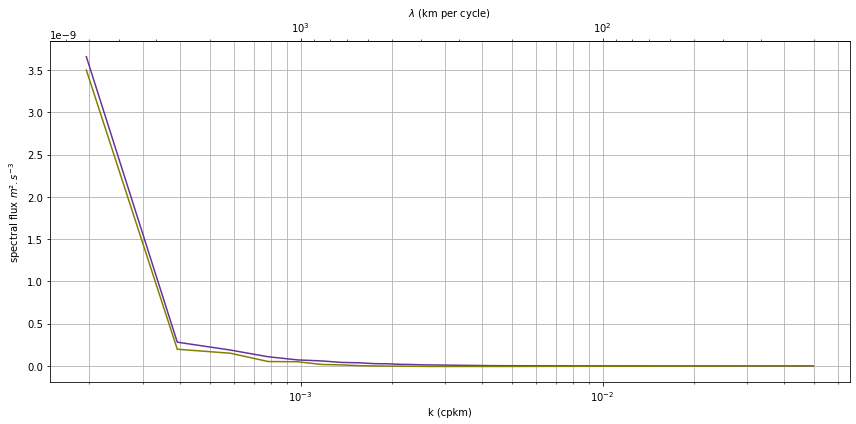

In [12]:
#forçage diabatique flot moyen
k_diab_me,fl_diab_me = qg.get_spec_flux(psi1= b_me[0], psi2 = diab_me, Delta = Delta)

k_diab_me_rel,fl_diab_me_rel = qg.get_spec_flux(psi1= b_me_rel[0], psi2 = diab_me_rel, Delta = Delta)

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)


ax2.plot(k_diab_me*1e3, fl_diab_me, color = 'rebeccapurple')
ax2.plot(k_diab_me_rel*1e3, fl_diab_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/diabatique_flot_moyen.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


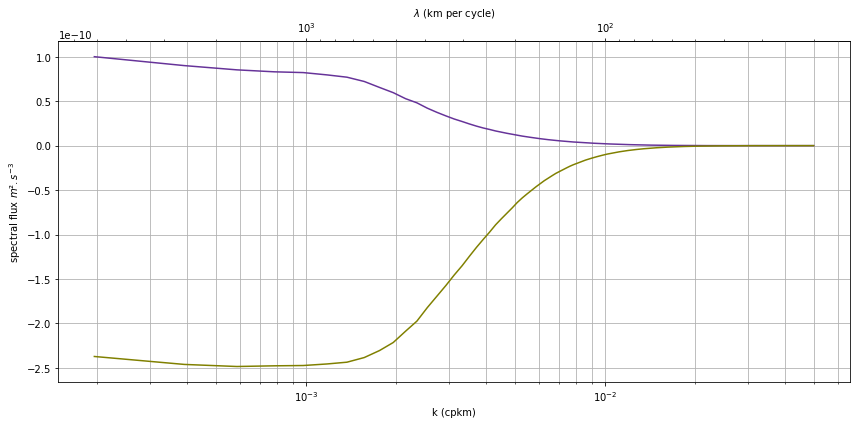

In [13]:
#diabatique perturbation

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)

ax2.plot(k_diab_p_me*1e3, fl_diab_p_me, color = 'rebeccapurple')
ax2.plot(k_diab_p_me_rel*1e3, fl_diab_p_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/diabatique_perturbation.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


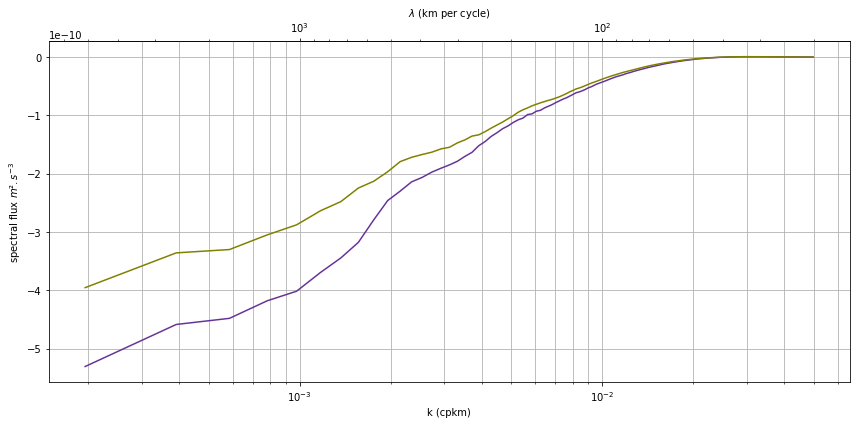

In [14]:
#mean KE to turbulent KE
k_ke,fl_ke = qg.get_spec_flux(psi1=p_me , psi2 = jac_ke , Delta = Delta)
k_ke_rel,fl_ke_rel = qg.get_spec_flux(psi1=p_me_rel , psi2 = jac_ke_rel , Delta = Delta)

fl_ke = integral_z(fl_ke, dh=dh, Delta=Delta, Ht = Ht)
fl_ke_rel = integral_z(fl_ke_rel, dh=dh, Delta=Delta, Ht = Ht)


fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)


ax2.plot(k_ke*1e3, fl_ke, color = 'rebeccapurple')
ax2.plot(k_ke_rel*1e3, fl_ke_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/ke_me2ke_p_me.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


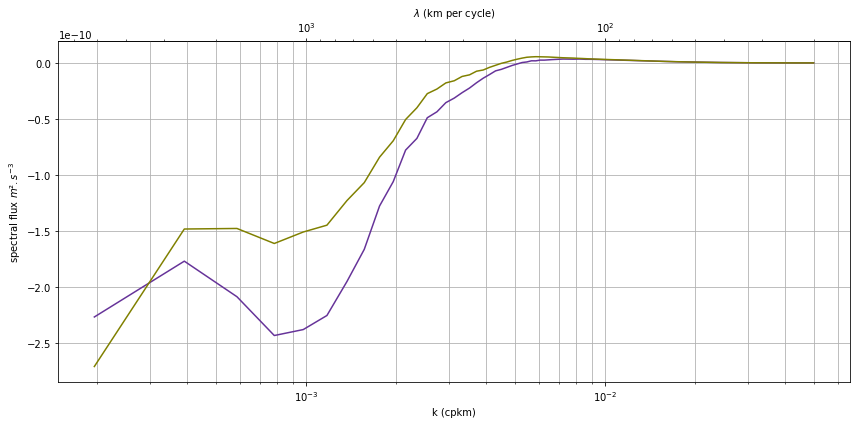

In [15]:
#mean PE to turbulent PE
k_pe,fl_pe = qg.get_spec_flux(psi1=p_me , psi2 = jac_pe , Delta = Delta)

fl_pe = integral_z(fl_pe, dh=dh, Delta=Delta, Ht = Ht)

k_pe_rel,fl_pe_rel = qg.get_spec_flux(psi1=p_me_rel , psi2 = jac_pe_rel , Delta = Delta)

fl_pe_rel = integral_z(fl_pe_rel, dh=dh, Delta=Delta, Ht = Ht)



fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)


ax2.plot(k_pe*1e3, fl_pe, color = 'rebeccapurple')
ax2.plot(k_pe_rel*1e3, fl_pe_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/pe_me2pe_p_me.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


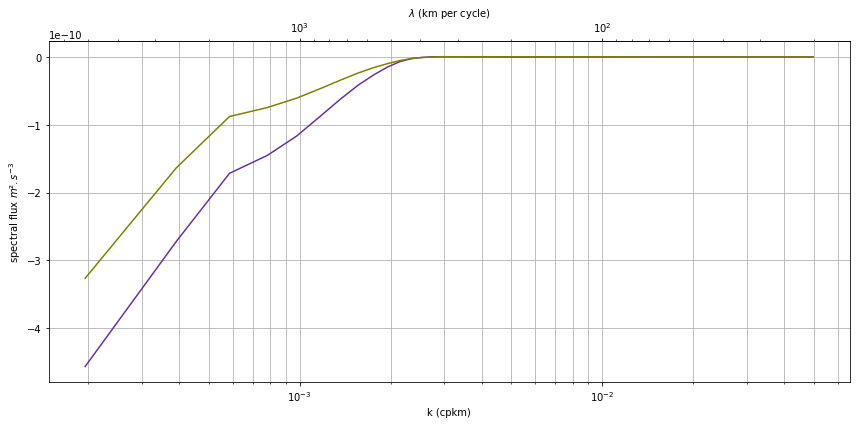

In [9]:
#w flot moyen


k_w_me,fl_w_me = qg.get_spec_flux(psi1= w_me, psi2 =b_me , Delta = Delta, window='hanning')

fl_w_me = integral_z(fl_w_me, dh=dh, Delta=Delta, Ht = Ht_b)


k_w_me_rel,fl_w_me_rel = qg.get_spec_flux(psi1= w_me_rel, psi2 =b_me_rel , Delta = Delta, window='hanning')

fl_w_me_rel = integral_z(fl_w_me_rel, dh=dh, Delta=Delta, Ht = Ht_b)




fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)


ax2.plot(k_w_me*1e3, fl_w_me, color = 'rebeccapurple')
ax2.plot(k_w_me_rel*1e3, fl_w_me_rel, color = 'olive')
#ax2.set_title('')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/w_flot_moyen.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


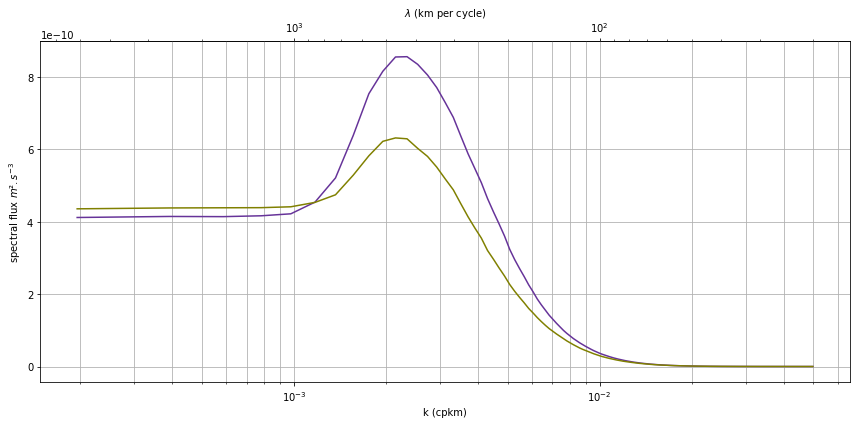

In [17]:
#w perturbation

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)



ax2.plot(k_w_p_me*1e3, fl_w_p_me, color = 'rebeccapurple')
ax2.plot(k_w_p_me_rel*1e3, fl_w_p_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/w_perturbation.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


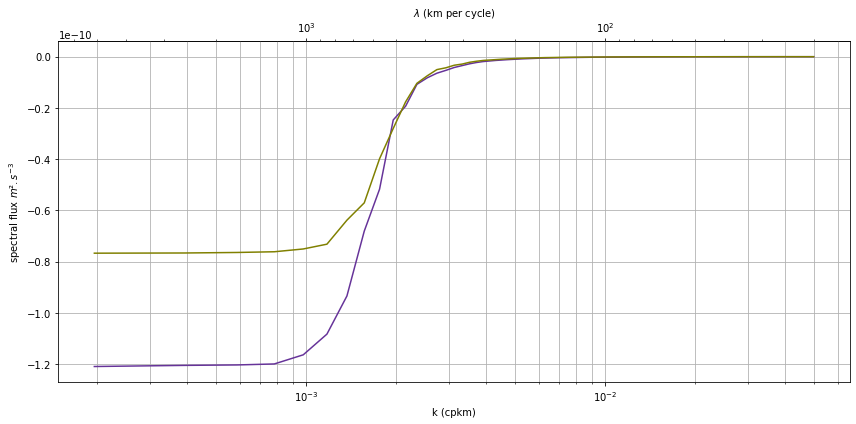

In [18]:
#bottom friction flot moyen
#flux
lap_p_me = bf*qg.laplacian(p_me[2], Delta)
lap_p_me_rel = bf*qg.laplacian(p_me_rel[2], Delta)

k_bf_me,fl_bf_me = qg.get_spec_flux(psi1=p_me[2] , psi2 = lap_p_me , Delta = Delta)

k_bf_me_rel,fl_bf_me_rel = qg.get_spec_flux(psi1=p_me_rel[2] , psi2 = lap_p_me_rel , Delta = Delta)

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)

ax2.plot(k_bf_me*1e3, fl_bf_me, color = 'rebeccapurple')
ax2.plot(k_bf_me_rel*1e3, fl_bf_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/bottom_flot_moyen.png')

<ipython-input-7-711fb66c38b2>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


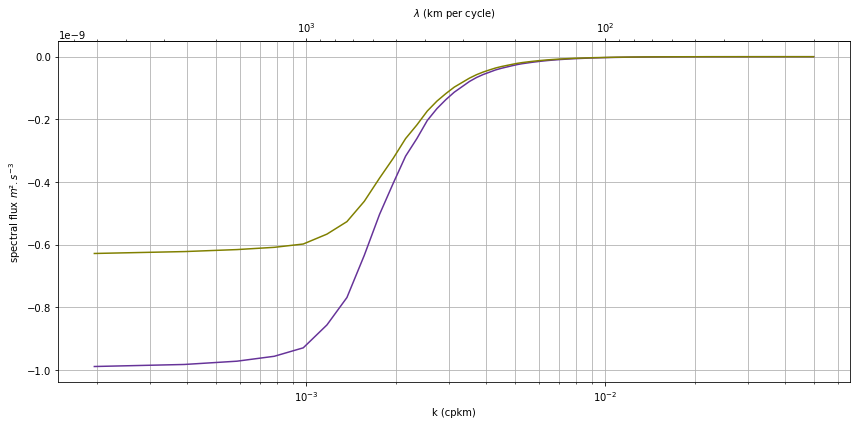

In [19]:
#bottom friction perturbation

fig, ax2 = plt.subplots(1, 1, figsize = (12,6),tight_layout=True)

ax2.plot(k_bottom_p_me*1e3, fl_bottom_p_me, color = 'rebeccapurple')
ax2.plot(k_bottom_p_me_rel*1e3, fl_bottom_p_me_rel, color = 'olive')
#ax2.set_title('bottom drag')
ax2.set_xlabel('k (cpkm)')
ax2.set_ylabel(r'spectral flux $m².s^{-3}$')#($m².s^{-2}.(rad.km^{-1})^{-1}$)')
ax2.set_xscale('log')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(0.001))
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.00025))
secax2 = ax2.secondary_xaxis('top', functions = (forward, inverse))
secax2.set_xlabel(r'$\lambda$ (km per cycle)')
ax2.grid(True, which = 'both')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/figs_spectres/bottom_perturbation.png')